In [2]:
import pandas as pd

df = pd.read_csv('NFL.csv')

# Hvor mange datapunkter mangler pr. kolonne
print(df.isnull().sum())

# Hvor meget af dataen mangler (kun vis hvis der er datamangel)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
print(missing_percent)

Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64
Age                    15.818234
Sprint_40yd             5.004314
Vertical_Jump          20.046017
Bench_Press_Reps       26.028185
Broad_Jump             20.937590
Agility_3cone          35.001438
Shuttle                32.786885
Drafted..tm.rnd.yr.    35.174001
dtype: float64


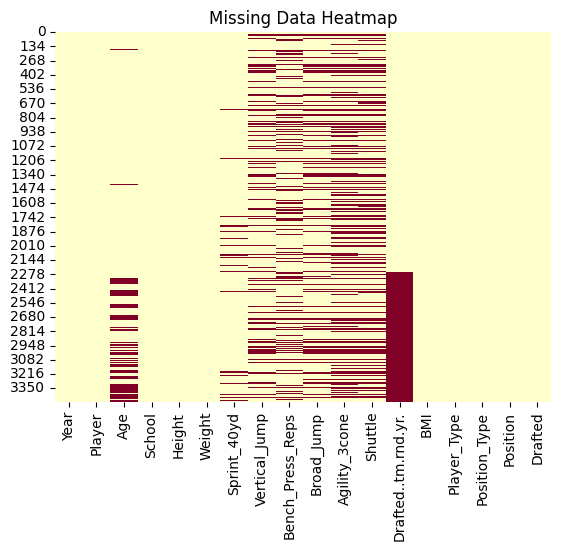

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()


In [5]:
import pandas as pd

df = pd.read_csv('NFL.csv')
df['Age_missing'] = df['Age'].isnull().astype(int)

# Sammenlign "missingness" med andre variabler for at se om Age er MAR eller MNAR.
print(df.groupby('Drafted')['Age_missing'].mean()) # Stor forskel her


Drafted
No     0.44072
Yes    0.00488
Name: Age_missing, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Indlæs datasættet
df = pd.read_csv('NFL.csv')

# Fjern kolonner, der ikke skal bruges
columns_to_drop = ['Year', 'Player', 'School', 'Drafted..tm.rnd.yr.', 'Player_Type', 'Position_Type']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Lav encoding på Position
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Position'] = le.fit_transform(df['Position'].astype(str))

# Del data op i features og målvariabel
X = df.drop(columns=['Drafted'])
y = df['Drafted'].map({'Yes': 1, 'No': 0})  # Encode målvariabel som binær

# -----------------------------
# Metode 1: Drop rækker med manglende data
df_dropped = df.dropna()
X_dropped = df_dropped.drop(columns=['Drafted'])
y_dropped = df_dropped['Drafted'].map({'Yes': 1, 'No': 0})

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)
rf_drop = RandomForestClassifier(random_state=42)
rf_drop.fit(X_train_drop, y_train_drop)
y_pred_drop = rf_drop.predict(X_test_drop)
acc_drop = accuracy_score(y_test_drop, y_pred_drop)

# -----------------------------
# Metode 2: Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(X)

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean_imputed, y, test_size=0.2, random_state=42)
rf_mean = RandomForestClassifier(random_state=42)
rf_mean.fit(X_train_mean, y_train_mean)
y_pred_mean = rf_mean.predict(X_test_mean)
acc_mean = accuracy_score(y_test_mean, y_pred_mean)

# -----------------------------
# Metode 3: KNN Imputation
knn_imputer = KNNImputer(n_neighbors=31)
X_knn_imputed = knn_imputer.fit_transform(X)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_imputed, y, test_size=0.2, random_state=42)
rf_knn = RandomForestClassifier(random_state=42)
rf_knn.fit(X_train_knn, y_train_knn)
y_pred_knn = rf_knn.predict(X_test_knn)
acc_knn = accuracy_score(y_test_knn, y_pred_knn)

# -----------------------------

# Beregn yderligere metrikker
def print_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

# Metrikker for hver metode
precision_drop, recall_drop, f1_drop = print_metrics(y_test_drop, y_pred_drop)
precision_mean, recall_mean, f1_mean = print_metrics(y_test_mean, y_pred_mean)
precision_knn, recall_knn, f1_knn = print_metrics(y_test_knn, y_pred_knn)

# P, R, F1
print("Precision, Recall, F1 for Dropped Rows: {:.2f}, {:.2f}, {:.2f}".format(precision_drop, recall_drop, f1_drop))
print("Precision, Recall, F1 for Mean Imputation: {:.2f}, {:.2f}, {:.2f}".format(precision_mean, recall_mean, f1_mean))
print("Precision, Recall, F1 for KNN Imputation: {:.2f}, {:.2f}, {:.2f}".format(precision_knn, recall_knn, f1_knn))

# Accuracy
print("Accuracy uden Imputation (Dropped Missing Rows): {:.2f}%".format(acc_drop * 100))
print("Accuracy med Mean Imputation: {:.2f}%".format(acc_mean * 100))
print("Accuracy med KNN Imputation: {:.2f}%".format(acc_knn * 100))



Precision, Recall, F1 for Dropped Rows: 0.82, 0.95, 0.88
Precision, Recall, F1 for Mean Imputation: 0.81, 0.94, 0.87
Precision, Recall, F1 for KNN Imputation: 0.82, 0.92, 0.87
Accuracy uden Imputation (Dropped Missing Rows): 79.33%
Accuracy med Mean Imputation: 80.89%
Accuracy med KNN Imputation: 80.75%
